## Data Load and Sanity Checks

In [2]:
from pathlib import Path
from typing import Dict, Tuple, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

NOTEBOOK_DIR = Path.cwd()
DATA_ROOT = NOTEBOOK_DIR / "data"

PARTICIPANT_DIRS = sorted(
    [p for p in DATA_ROOT.iterdir() if p.is_dir() and p.name.startswith("participant_")]
)
PARTICIPANTS = [p.name for p in PARTICIPANT_DIRS]

ROUND_NAMES = ['round_0', 'round_1']

DATASETS = [
    "bag_items",
    "bag_values",
    "enemies",
    "inputs",
    "inventory",
    "mouse",
    "player_health",
    "side_weapon",
    "waves",
    "weapon_slot",
]


def read_dataset(path: Path) -> pd.DataFrame:
    df = pd.read_csv(path)
    if "timestamp" in df.columns:
        df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%dT%H:%M:%S")
    return df


def load_round_for_participant(
    participant_dir: Path, participant_name: str, round_name: str
) -> Dict[str, pd.DataFrame]:
    round_path = participant_dir / round_name
    loaded: Dict[str, pd.DataFrame] = {}
    for name in DATASETS:
        file_path = round_path / f"{name}.csv"
        df = read_dataset(file_path)
        df = df.copy()
        df["participant"] = participant_name
        df["round"] = round_name
        loaded[name] = df
    return loaded

# Load all participants and aggregate by round
data_by_participant: Dict[str, Dict[str, Dict[str, pd.DataFrame]]] = {}
for p_dir in PARTICIPANT_DIRS:
    pname = p_dir.name
    data_by_participant[pname] = {}
    for rname in ROUND_NAMES:
        if (p_dir / rname).exists():
            data_by_participant[pname][rname] = load_round_for_participant(p_dir, pname, rname)


# Aggregate per round across participants
data: Dict[str, Dict[str, pd.DataFrame]] = {}
for rname in ROUND_NAMES:
    aggregated: Dict[str, pd.DataFrame] = {}
    for dset in DATASETS:
        frames: List[pd.DataFrame] = []
        for pname in PARTICIPANTS:
            prounds = data_by_participant.get(pname, {})
            if rname in prounds:
                frames.append(prounds[rname][dset])
        aggregated[dset] = pd.concat(frames, ignore_index=True) if frames else pd.DataFrame()
    data[rname] = aggregated

In [3]:
# Quick sanity check of discovery
print("Participants discovered:", PARTICIPANTS)

print("Data from participant_01 (round_0):")
for i in data_by_participant['participant_01']['round_0'].keys():
    print(i)
    display(data_by_participant['participant_01']['round_0'][i])
    
print("\n\n")

for p in PARTICIPANT_DIRS:
    rounds_found_participant = [rdir.name for rdir in p.iterdir() if rdir.is_dir()]
    if "round_0" not in rounds_found_participant or "round_1" not in rounds_found_participant:
        print(f"Warning: Participant {p.name} is missing rounds: found {rounds_found_participant}")

Participants discovered: ['participant_01', 'participant_02', 'participant_03', 'participant_04', 'participant_05', 'participant_06', 'participant_07', 'participant_08', 'participant_09', 'participant_10', 'participant_11', 'participant_12', 'participant_13', 'participant_14', 'participant_15', 'participant_16']
Data from participant_01 (round_0):
bag_items


,timestamp,x,y,item,participant,round
0,2026-01-24 18:47:22,0,0,Coin,participant_01,round_0
1,2026-01-24 18:47:28,0,0,Coin,participant_01,round_0
2,2026-01-24 18:47:28,1,0,Potion2,participant_01,round_0
3,2026-01-24 18:47:28,2,0,Potion2,participant_01,round_0
4,2026-01-24 18:47:28,1,1,Potion2,participant_01,round_0
...,...,...,...,...,...,...
1378,2026-01-24 18:53:01,4,4,Potion2,participant_01,round_0
1379,2026-01-24 18:53:01,0,5,Potion2,participant_01,round_0
1380,2026-01-24 18:53:01,1,5,Potion2,participant_01,round_0
1381,2026-01-24 18:53:01,3,5,Potion2,participant_01,round_0


bag_values


,timestamp,value,participant,round
0,2026-01-24 18:47:22,20,participant_01,round_0
1,2026-01-24 18:47:28,30,participant_01,round_0
2,2026-01-24 18:47:29,45,participant_01,round_0
3,2026-01-24 18:47:36,30,participant_01,round_0
4,2026-01-24 18:47:52,40,participant_01,round_0
...,...,...,...,...
57,2026-01-24 18:52:41,105,participant_01,round_0
58,2026-01-24 18:52:52,95,participant_01,round_0
59,2026-01-24 18:52:53,65,participant_01,round_0
60,2026-01-24 18:52:55,75,participant_01,round_0


enemies


,timestamp,amount,closest_distance,participant,round
0,2026-01-24 18:47:10,0,inf,participant_01,round_0
1,2026-01-24 18:47:11,0,inf,participant_01,round_0
2,2026-01-24 18:47:12,0,inf,participant_01,round_0
3,2026-01-24 18:47:13,0,inf,participant_01,round_0
4,2026-01-24 18:47:14,0,inf,participant_01,round_0
...,...,...,...,...,...
185,2026-01-24 18:53:21,8,34.19,participant_01,round_0
186,2026-01-24 18:53:22,8,34.19,participant_01,round_0
187,2026-01-24 18:53:23,8,34.19,participant_01,round_0
188,2026-01-24 18:53:24,8,34.19,participant_01,round_0


inputs


,timestamp,event,participant,round
0,2026-01-24 18:47:11,A,participant_01,round_0
1,2026-01-24 18:47:12,A,participant_01,round_0
2,2026-01-24 18:47:12,A,participant_01,round_0
3,2026-01-24 18:47:12,A,participant_01,round_0
4,2026-01-24 18:47:12,A,participant_01,round_0
...,...,...,...,...
4065,2026-01-24 18:53:11,A,participant_01,round_0
4066,2026-01-24 18:53:12,A,participant_01,round_0
4067,2026-01-24 18:53:12,A,participant_01,round_0
4068,2026-01-24 18:53:26,Left Mouse Button,participant_01,round_0


inventory


,timestamp,event,participant,round
0,2026-01-24 18:47:31,OPEN,participant_01,round_0
1,2026-01-24 18:47:42,CLOSE,participant_01,round_0
2,2026-01-24 18:47:43,OPEN,participant_01,round_0
3,2026-01-24 18:47:44,CLOSE,participant_01,round_0
4,2026-01-24 18:47:59,OPEN,participant_01,round_0
5,2026-01-24 18:48:00,CLOSE,participant_01,round_0
6,2026-01-24 18:48:37,OPEN,participant_01,round_0
7,2026-01-24 18:49:46,CLOSE,participant_01,round_0
8,2026-01-24 18:50:05,OPEN,participant_01,round_0
9,2026-01-24 18:50:15,CLOSE,participant_01,round_0


mouse


,timestamp,x,y,participant,round
0,2026-01-24 18:47:09,513,316,participant_01,round_0
1,2026-01-24 18:47:10,455,297,participant_01,round_0
2,2026-01-24 18:47:11,455,298,participant_01,round_0
3,2026-01-24 18:47:12,455,298,participant_01,round_0
4,2026-01-24 18:47:13,455,298,participant_01,round_0
...,...,...,...,...,...
198,2026-01-24 18:53:22,514,348,participant_01,round_0
199,2026-01-24 18:53:23,504,288,participant_01,round_0
200,2026-01-24 18:53:24,504,296,participant_01,round_0
201,2026-01-24 18:53:25,504,296,participant_01,round_0


player_health


,timestamp,health,participant,round
0,2026-01-24 18:47:09,100,participant_01,round_0
1,2026-01-24 18:47:22,90,participant_01,round_0
2,2026-01-24 18:47:42,80,participant_01,round_0
3,2026-01-24 18:48:05,60,participant_01,round_0
4,2026-01-24 18:48:22,20,participant_01,round_0
5,2026-01-24 18:49:20,40,participant_01,round_0
6,2026-01-24 18:49:22,60,participant_01,round_0
7,2026-01-24 18:49:29,100,participant_01,round_0
8,2026-01-24 18:50:00,80,participant_01,round_0
9,2026-01-24 18:51:40,60,participant_01,round_0


side_weapon


,timestamp,item,participant,round
0,2026-01-24 18:49:34,WeaponGreen,participant_01,round_0
1,2026-01-24 18:49:37,NONE,participant_01,round_0
2,2026-01-24 18:51:53,WeaponRed,participant_01,round_0
3,2026-01-24 18:51:55,NONE,participant_01,round_0
4,2026-01-24 18:52:01,WeaponBlue,participant_01,round_0


waves


,timestamp,wave,status,participant,round
0,2026-01-24 18:47:19,0,STARTED,participant_01,round_0
1,2026-01-24 18:47:48,0,COMPLETED,participant_01,round_0
2,2026-01-24 18:47:58,1,STARTED,participant_01,round_0
3,2026-01-24 18:48:06,1,COMPLETED,participant_01,round_0
4,2026-01-24 18:48:16,2,STARTED,participant_01,round_0
5,2026-01-24 18:48:25,2,COMPLETED,participant_01,round_0
6,2026-01-24 18:48:35,3,STARTED,participant_01,round_0
7,2026-01-24 18:50:16,3,COMPLETED,participant_01,round_0
8,2026-01-24 18:50:26,4,STARTED,participant_01,round_0
9,2026-01-24 18:51:10,4,COMPLETED,participant_01,round_0


weapon_slot


,timestamp,item,participant,round
0,2026-01-24 18:47:39,WeaponRed,participant_01,round_0
1,2026-01-24 18:50:07,NONE,participant_01,round_0
2,2026-01-24 18:50:14,WeaponGreen,participant_01,round_0
3,2026-01-24 18:50:39,NONE,participant_01,round_0
4,2026-01-24 18:51:01,WeaponRed,participant_01,round_0
5,2026-01-24 18:51:47,NONE,participant_01,round_0
6,2026-01-24 18:51:54,WeaponBlue,participant_01,round_0
7,2026-01-24 18:52:01,NONE,participant_01,round_0
8,2026-01-24 18:52:02,WeaponGreen,participant_01,round_0


In [4]:
# Load questionnaire data for each participant
questionnaire_data = {}
questionnaire_file = Path("quantux___experiment_questionnaire.csv")
if not questionnaire_file.exists():
    raise FileNotFoundError(f"Questionnaire file not found: {questionnaire_file}")
df = pd.read_csv(questionnaire_file)
for _, row in df.iterrows():
    participant_name = row["Nom d'utilisateur"]
    questionnaire_data[participant_name] = row
    
display(questionnaire_data['participant_01'])

Séquentiel                                                                                                                       5
SID                                                                                                                       31805505
Heure de soumission                                                                                             24/01/2026 - 19:46
Heure de complétion                                                                                             24/01/2026 - 19:46
Heure de modification                                                                                           26/01/2026 - 16:52
Brouillon                                                                                                                        0
Adresse IP                                                                                                                 0.0.0.0
UID                                                                                

In [5]:
# calculate the summary of questionnaire questions
ages = []
male_counts = 0
female_counts = 0
for pdata in questionnaire_data.values():
    age = pdata['What is your age?']
    if pd.notna(age):
        ages.append(int(age))
    
average_age = sum(ages) / len(ages) if ages else None

print(f"Average age of participants: {average_age:.2f}" if average_age is not None else "No age data available.")

Average age of participants: 21.56


In [6]:
def summarize_round(datasets: Dict[str, pd.DataFrame]) -> pd.DataFrame:
    rows = []
    for name, df in datasets.items():
        ts = df["timestamp"] if "timestamp" in df.columns else None
        rows.append(
            {
                "dataset": name,
                "rows": len(df),
                "start": ts.min() if ts is not None else pd.NaT,
                "end": ts.max() if ts is not None else pd.NaT,
                "columns": list(df.columns),
            }
        )
    return pd.DataFrame(rows).sort_values("dataset").reset_index(drop=True)


summary = {r: summarize_round(d) for r, d in data.items()}
for round_name, df in summary.items():
    print(f"=== {round_name} ===")
    display(df)


=== round_0 ===


,dataset,rows,start,end,columns
0,bag_items,26275,2026-01-24 18:47:22,2026-01-28 19:00:10,"[timestamp, x, y, item, participant, round]"
1,bag_values,1018,2026-01-24 18:47:22,2026-01-28 19:00:10,"[timestamp, value, participant, round]"
2,enemies,2815,2026-01-24 18:47:10,2026-01-28 19:00:27,"[timestamp, amount, closest_distance, particip..."
3,inputs,45783,2026-01-24 18:47:11,2026-01-28 19:00:28,"[timestamp, event, participant, round]"
4,inventory,626,2026-01-24 18:47:31,2026-01-28 19:00:12,"[timestamp, event, participant, round]"
5,mouse,3125,2026-01-24 18:47:09,2026-01-28 19:00:28,"[timestamp, x, y, participant, round]"
6,player_health,197,2026-01-24 18:47:09,2026-01-28 19:00:16,"[timestamp, health, participant, round]"
7,side_weapon,55,2026-01-24 18:49:34,2026-01-28 18:59:24,"[timestamp, item, participant, round]"
8,waves,185,2026-01-24 18:47:19,2026-01-28 19:00:14,"[timestamp, wave, status, participant, round]"
9,weapon_slot,146,2026-01-24 18:47:39,2026-01-28 18:56:10,"[timestamp, item, participant, round]"


=== round_1 ===


,dataset,rows,start,end,columns
0,bag_items,24835,2026-01-24 18:53:52,2026-01-28 19:05:18,"[timestamp, x, y, item, participant, round]"
1,bag_values,986,2026-01-24 18:53:52,2026-01-28 19:05:18,"[timestamp, value, participant, round]"
2,enemies,3634,2026-01-24 18:53:48,2026-01-28 19:05:26,"[timestamp, amount, closest_distance, particip..."
3,inputs,57220,2026-01-24 18:53:48,2026-01-28 19:05:26,"[timestamp, event, participant, round]"
4,inventory,731,2026-01-24 18:53:49,2026-01-28 19:05:20,"[timestamp, event, participant, round]"
5,mouse,3997,2026-01-24 18:53:47,2026-01-28 19:05:26,"[timestamp, x, y, participant, round]"
6,player_health,202,2026-01-24 18:53:47,2026-01-28 19:04:37,"[timestamp, health, participant, round]"
7,side_weapon,95,2026-01-24 18:55:21,2026-01-28 19:05:19,"[timestamp, item, participant, round]"
8,waves,237,2026-01-24 18:54:00,2026-01-28 19:05:22,"[timestamp, wave, status, participant, round]"
9,weapon_slot,135,2026-01-24 18:54:45,2026-01-28 19:00:50,"[timestamp, item, participant, round]"


## Inventory timestamp analyses

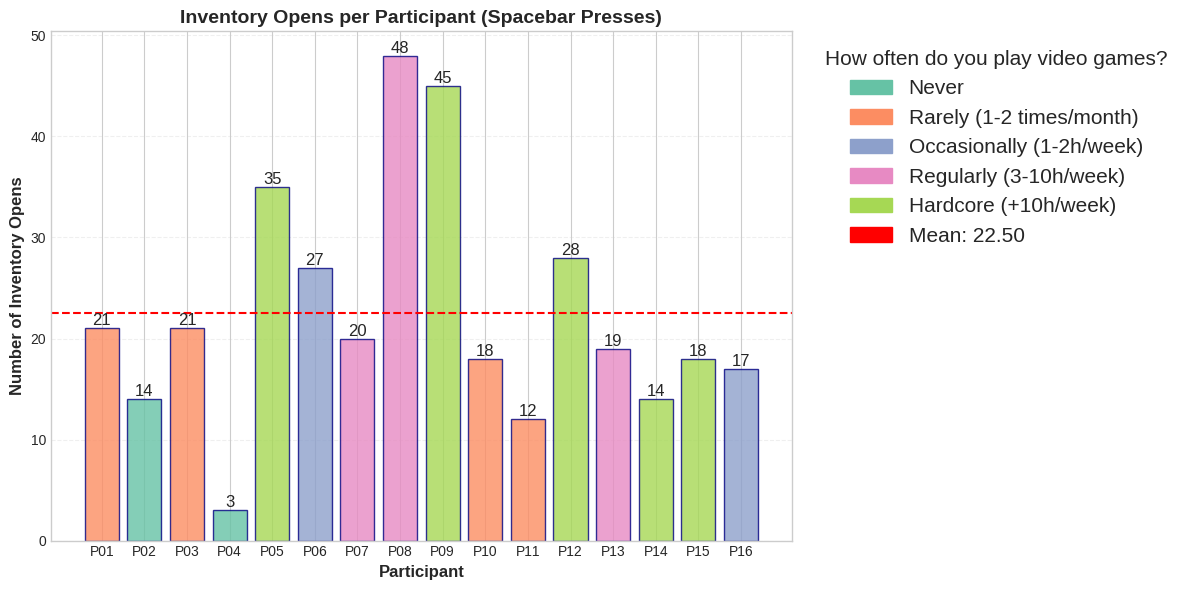


Inventory Open Counts per Participant:
----------------------------------------
participant_01: 21 (Rarely (1-2 times/month))
participant_02: 14 (Never)
participant_03: 21 (Rarely (1-2 times/month))
participant_04: 3 (Never)
participant_05: 35 (Hardcore (+10h/week))
participant_06: 27 (Occasionally (1-2h/week))
participant_07: 20 (Regularly (3-10h/week))
participant_08: 48 (Regularly (3-10h/week))
participant_09: 45 (Hardcore (+10h/week))
participant_10: 18 (Rarely (1-2 times/month))
participant_11: 12 (Rarely (1-2 times/month))
participant_12: 28 (Hardcore (+10h/week))
participant_13: 19 (Regularly (3-10h/week))
participant_14: 14 (Hardcore (+10h/week))
participant_15: 18 (Hardcore (+10h/week))
participant_16: 17 (Occasionally (1-2h/week))
----------------------------------------
Mean: 22.50
Median: 19.50
Min: 3
Max: 48


In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Count inventory opens per participant
inventory_opens = {}

for participant_dir in sorted(PARTICIPANT_DIRS):
    participant_name = participant_dir.name
    opens_count = 0
    
    # Check only round_1
    for round_name in ['round_1']:
        inventory_file = participant_dir / round_name / 'inventory.csv'
        if inventory_file.exists():
            df_inv = pd.read_csv(inventory_file)
            # Count OPEN events
            opens_count += (df_inv['event'] == 'OPEN').sum()
    
    inventory_opens[participant_name] = opens_count

# Map participants to questionnaire answers
question_key = "How often do you play video games?"
def get_gaming_frequency(participant_name: str) -> str:
    row = questionnaire_data.get(participant_name)
    if row is None or question_key not in row:
        return "Unknown"
    value = row[question_key]
    if pd.isna(value):
        return "Unknown"
    value = str(value).strip()
    return value if value else "Unknown"

participant_frequency = {p: get_gaming_frequency(p) for p in inventory_opens.keys()}

# Order and color mapping for categories
category_order = [
    "Never",
    "Rarely (1-2 times/month)",
    "Occasionally (1-2h/week)",
    "Regularly (3-10h/week)",
    "Hardcore (+10h/week)",
    "Unknown",
]
extra_categories = [c for c in sorted(set(participant_frequency.values())) if c not in category_order]
categories = [c for c in category_order if c in set(participant_frequency.values())] + extra_categories
palette = sns.color_palette("Set2", n_colors=len(categories))
category_colors = {cat: palette[i] for i, cat in enumerate(categories)}

# Sort by participant name
participants_sorted = sorted(inventory_opens.keys())
opens_sorted = [inventory_opens[p] for p in participants_sorted]
participant_labels = [p.replace('participant_', 'P') for p in participants_sorted]
freq_sorted = [participant_frequency[p] for p in participants_sorted]
bar_colors = [category_colors[f] for f in freq_sorted]

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(participant_labels, opens_sorted, color=bar_colors, edgecolor='navy', alpha=0.8)

# Customize the plot
ax.set_xlabel('Participant', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Inventory Opens', fontsize=12, fontweight='bold')
ax.set_title('Inventory Opens per Participant (Spacebar Presses)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12)

# add mean horizontal line 
mean_opens = np.mean(opens_sorted)
plt.axhline(y=mean_opens, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_opens:.2f}')

# Legend for gaming frequency categories
legend_handles = [mpatches.Patch(color=category_colors[c], label=c) for c in categories]
legend_handles.append(mpatches.Patch(color='red', label=f'Mean: {mean_opens:.2f}'))
ax.legend(handles=legend_handles, title=question_key, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=15, title_fontsize=15)


plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nInventory Open Counts per Participant:")
print("-" * 40)
for p, count in sorted(inventory_opens.items()):
    print(f"{p}: {count} (" + participant_frequency.get(p, "Unknown") + ")")
print("-" * 40)
print(f"Mean: {np.mean(list(inventory_opens.values())):.2f}")
print(f"Median: {np.median(list(inventory_opens.values())):.2f}")
print(f"Min: {min(inventory_opens.values())}")
print(f"Max: {max(inventory_opens.values())}")

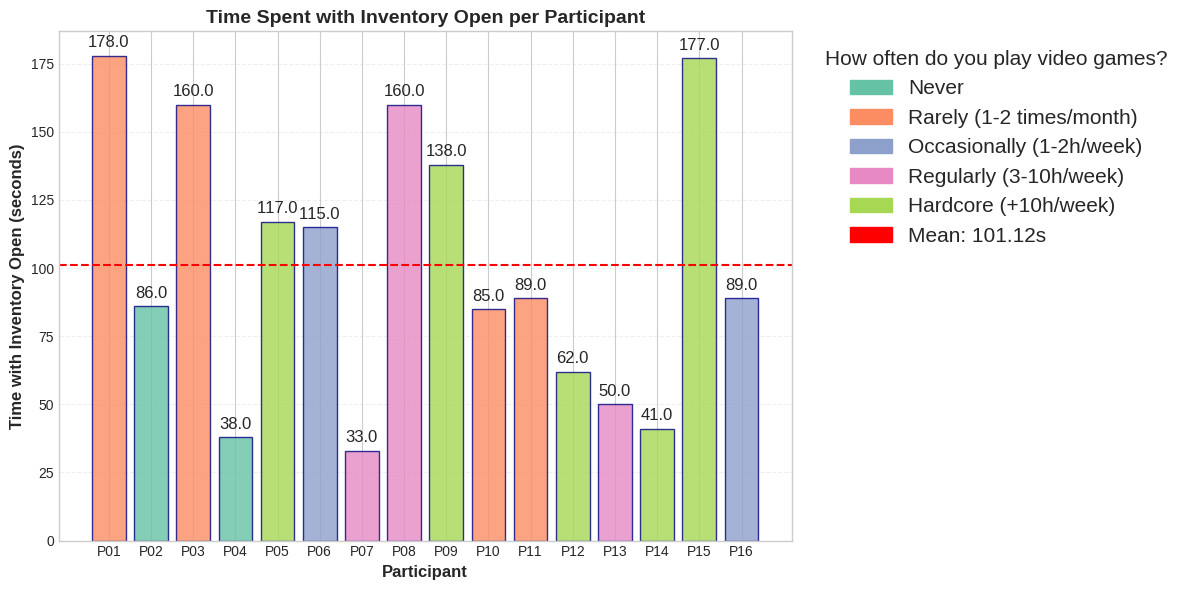


Time with Inventory Open per Participant:
----------------------------------------
participant_01: 178.00s (2.97 min) - Rarely (1-2 times/month)
participant_02: 86.00s (1.43 min) - Never
participant_03: 160.00s (2.67 min) - Rarely (1-2 times/month)
participant_04: 38.00s (0.63 min) - Never
participant_05: 117.00s (1.95 min) - Hardcore (+10h/week)
participant_06: 115.00s (1.92 min) - Occasionally (1-2h/week)
participant_07: 33.00s (0.55 min) - Regularly (3-10h/week)
participant_08: 160.00s (2.67 min) - Regularly (3-10h/week)
participant_09: 138.00s (2.30 min) - Hardcore (+10h/week)
participant_10: 85.00s (1.42 min) - Rarely (1-2 times/month)
participant_11: 89.00s (1.48 min) - Rarely (1-2 times/month)
participant_12: 62.00s (1.03 min) - Hardcore (+10h/week)
participant_13: 50.00s (0.83 min) - Regularly (3-10h/week)
participant_14: 41.00s (0.68 min) - Hardcore (+10h/week)
participant_15: 177.00s (2.95 min) - Hardcore (+10h/week)
participant_16: 89.00s (1.48 min) - Occasionally (1-2h/wee

In [8]:
# Calculate time spent with inventory open per participant
inventory_time_open = {}

for participant_dir in sorted(PARTICIPANT_DIRS):
    participant_name = participant_dir.name
    total_time_open = 0.0  # in seconds
    
    # Check both round_0 and round_1
    for round_name in ['round_1']:
        inventory_file = participant_dir / round_name / 'inventory.csv'
        if inventory_file.exists():
            df_inv = pd.read_csv(inventory_file)
            df_inv['timestamp'] = pd.to_datetime(df_inv['timestamp'], format="%Y-%m-%dT%H:%M:%S")
            
            # Track open/close pairs
            open_time = None
            for _, row in df_inv.iterrows():
                if row['event'] == 'OPEN':
                    open_time = row['timestamp']
                elif row['event'] == 'CLOSE' and open_time is not None:
                    close_time = row['timestamp']
                    duration = (close_time - open_time).total_seconds()
                    total_time_open += duration
                    open_time = None
    
    inventory_time_open[participant_name] = total_time_open

# Sort by participant name
participants_sorted = sorted(inventory_time_open.keys())
time_sorted = [inventory_time_open[p] for p in participants_sorted]
participant_labels = [p.replace('participant_', 'P') for p in participants_sorted]
freq_sorted = [participant_frequency[p] for p in participants_sorted]
bar_colors = [category_colors[f] for f in freq_sorted]

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(participant_labels, time_sorted, color=bar_colors, edgecolor='navy', alpha=0.8)

# Customize the plot
ax.set_xlabel('Participant', fontsize=12, fontweight='bold')
ax.set_ylabel('Time with Inventory Open (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Time Spent with Inventory Open per Participant', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{height:.1f}',
            ha='center', va='bottom', fontsize=12)

# Add mean horizontal line
mean_time = np.mean(time_sorted)
plt.axhline(y=mean_time, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_time:.2f}s')

# Legend for gaming frequency categories
legend_handles = [mpatches.Patch(color=category_colors[c], label=c) for c in categories]
legend_handles.append(mpatches.Patch(color='red', label=f'Mean: {mean_time:.2f}s'))
ax.legend(handles=legend_handles, title=question_key, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=15, title_fontsize=15)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTime with Inventory Open per Participant:")
print("-" * 40)
for p, time in sorted(inventory_time_open.items()):
    print(f"{p}: {time:.2f}s ({time/60:.2f} min) - " + participant_frequency.get(p, "Unknown"))
print("-" * 40)
print(f"Mean: {np.mean(list(inventory_time_open.values())):.2f}s ({np.mean(list(inventory_time_open.values()))/60:.2f} min)")
print(f"Median: {np.median(list(inventory_time_open.values())):.2f}s ({np.median(list(inventory_time_open.values()))/60:.2f} min)")
print(f"Min: {min(inventory_time_open.values()):.2f}s")
print(f"Max: {max(inventory_time_open.values()):.2f}s")

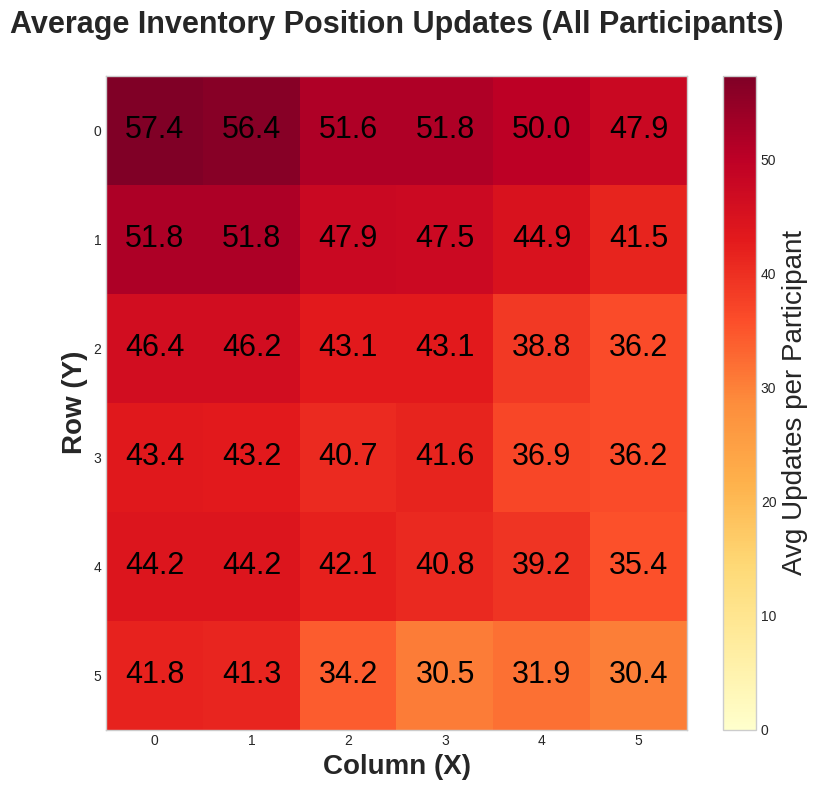


Inventory Position Update Statistics (All Participants):
Total participants: 16
Total updates: 24835
Avg updates per participant: 1552.2
Total unique positions used: 36

Top 10 positions overall:
  1. (0, 0): 57.38 avg updates per participant (total: 918)
  2. (1, 0): 56.38 avg updates per participant (total: 902)
  3. (0, 1): 51.81 avg updates per participant (total: 829)
  4. (1, 1): 51.81 avg updates per participant (total: 829)
  5. (3, 0): 51.75 avg updates per participant (total: 828)
  6. (2, 0): 51.62 avg updates per participant (total: 826)
  7. (4, 0): 50.00 avg updates per participant (total: 800)
  8. (5, 0): 47.94 avg updates per participant (total: 767)
  9. (2, 1): 47.88 avg updates per participant (total: 766)
  10. (3, 1): 47.50 avg updates per participant (total: 760)


In [34]:
# (per cateory) Create heatmap of inventory positions grouped by gaming frequency
# Use bag_items data which tracks x,y positions and items in inventory

# Collect all bag_items data across all participants and both rounds with gaming frequency
all_bag_items = []
for participant_dir in sorted(PARTICIPANT_DIRS):
    participant_name = participant_dir.name
    frequency = participant_frequency.get(participant_name, "Unknown")
    for round_name in ['round_1']:
        bag_items_file = participant_dir / round_name / 'bag_items.csv'
        if bag_items_file.exists():
            df = pd.read_csv(bag_items_file)
            df['participant'] = participant_name
            df['round'] = round_name
            df['frequency'] = frequency
            all_bag_items.append(df)

df_all_bag_items = pd.concat(all_bag_items, ignore_index=True)

# Get grid dimensions
max_x = df_all_bag_items['x'].max()
max_y = df_all_bag_items['y'].max()

# Define the 5 gaming frequency categories
gaming_categories = [
    "Never",
    "Rarely (1-2 times/month)",
    "Occasionally (1-2h/week)",
    "Regularly (3-10h/week)",
    "Hardcore (+10h/week)"
]

# Create single grouped heatmap for all participants combined
fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)

# Count all participants
total_participants = df_all_bag_items['participant'].nunique()

# Count updates per position across all participants
position_counts_all = df_all_bag_items.groupby(['x', 'y']).size().reset_index(name='count')

# Create heatmap matrix
heatmap_data = np.zeros((int(max_y) + 1, int(max_x) + 1))
for _, row in position_counts_all.iterrows():
    heatmap_data[int(row['y']), int(row['x'])] = row['count']

# Calculate average per participant
heatmap_data_avg = heatmap_data / total_participants
vmax = heatmap_data_avg.max() if heatmap_data_avg.max() > 0 else 1

# Plot heatmap
im = ax.imshow(heatmap_data_avg, cmap='YlOrRd', aspect='auto', interpolation='nearest', vmin=0, vmax=vmax)
ax.set_xlabel('Column (X)', fontsize=20, fontweight='bold')
ax.set_ylabel('Row (Y)', fontsize=20, fontweight='bold')
ax.set_title('Average Inventory Position Updates (All Participants)\n', fontsize=22, fontweight='bold')
ax.set_xticks(range(int(max_x) + 1))
ax.set_yticks(range(int(max_y) + 1))

# Add text annotations
for i in range(int(max_y) + 1):
    for j in range(int(max_x) + 1):
        if heatmap_data_avg[i, j] > 0:
            text = ax.text(j, i, f'{heatmap_data_avg[i, j]:.1f}',
                          ha="center", va="center", color="black", fontsize=22)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Avg Updates per Participant', fontsize=20)

plt.tight_layout()
plt.show()

# Print overall statistics
print("\nInventory Position Update Statistics (All Participants):")
print("=" * 80)
print(f"Total participants: {total_participants}")
print(f"Total updates: {len(df_all_bag_items)}")
print(f"Avg updates per participant: {len(df_all_bag_items) / total_participants:.1f}")
print(f"Total unique positions used: {len(position_counts_all)}")

# Top 10 positions overall
print("\nTop 10 positions overall:")
top_10 = position_counts_all.nlargest(10, 'count')
for idx, (_, row) in enumerate(top_10.iterrows(), 1):
    avg = row['count'] / total_participants
    print(f"  {idx}. ({int(row['x'])}, {int(row['y'])}): {avg:.2f} avg updates per participant (total: {int(row['count'])})")

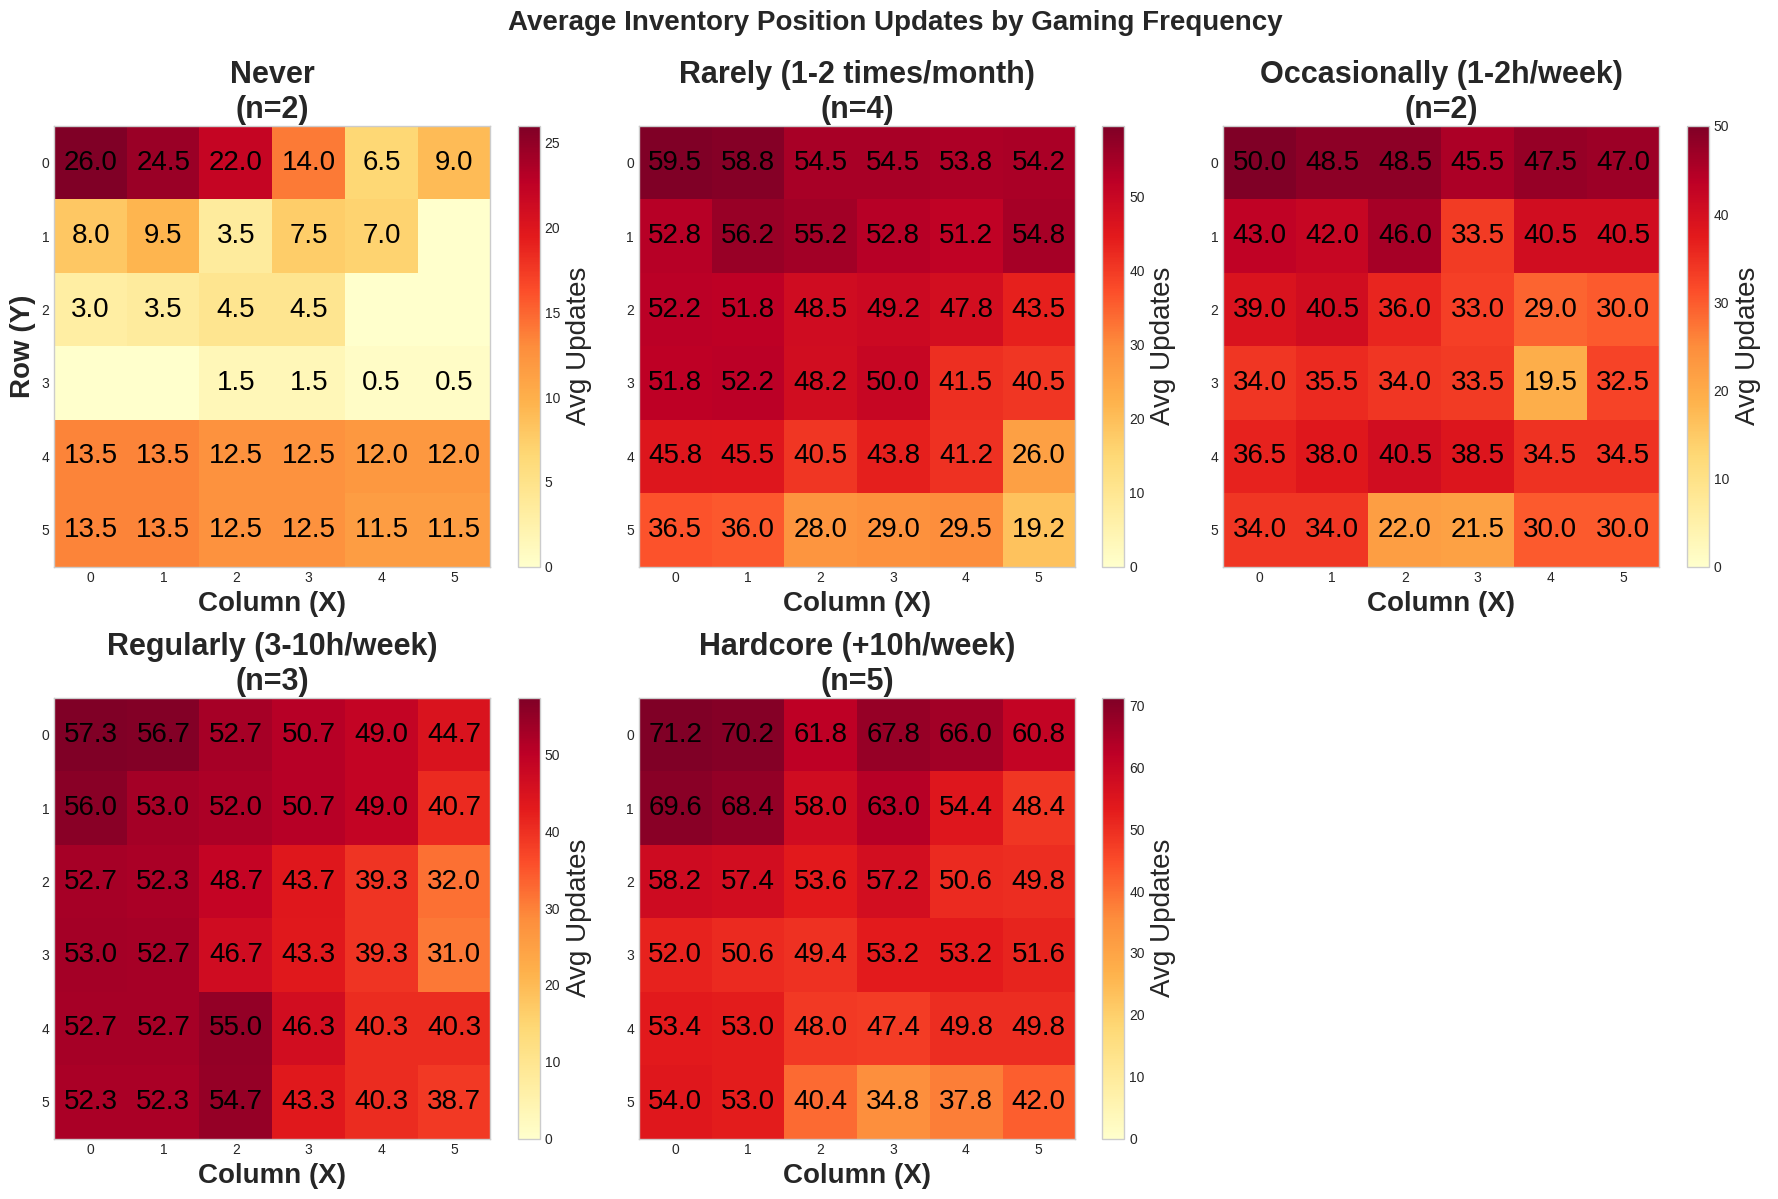


Inventory Position Update Statistics by Gaming Frequency:

Never:
  Participants: 2
  Total updates: 616
  Avg updates per participant: 308.0
  Top 3 positions:
    (0, 0): 26.0 avg updates per participant
    (1, 0): 24.5 avg updates per participant
    (2, 0): 22.0 avg updates per participant

Rarely (1-2 times/month):
  Participants: 4
  Total updates: 6626
  Avg updates per participant: 1656.5
  Top 3 positions:
    (0, 0): 59.5 avg updates per participant
    (1, 0): 58.8 avg updates per participant
    (1, 1): 56.2 avg updates per participant

Occasionally (1-2h/week):
  Participants: 2
  Total updates: 2646
  Avg updates per participant: 1323.0
  Top 3 positions:
    (0, 0): 50.0 avg updates per participant
    (1, 0): 48.5 avg updates per participant
    (2, 0): 48.5 avg updates per participant

Regularly (3-10h/week):
  Participants: 3
  Total updates: 5148
  Avg updates per participant: 1716.0
  Top 3 positions:
    (0, 0): 57.3 avg updates per participant
    (1, 0): 56.7 a

In [27]:
# (per cateory) Create heatmap of inventory positions grouped by gaming frequency
# Use bag_items data which tracks x,y positions and items in inventory

# Collect all bag_items data across all participants and both rounds with gaming frequency
all_bag_items = []
for participant_dir in sorted(PARTICIPANT_DIRS):
    participant_name = participant_dir.name
    frequency = participant_frequency.get(participant_name, "Unknown")
    for round_name in ['round_1']:
        bag_items_file = participant_dir / round_name / 'bag_items.csv'
        if bag_items_file.exists():
            df = pd.read_csv(bag_items_file)
            df['participant'] = participant_name
            df['round'] = round_name
            df['frequency'] = frequency
            all_bag_items.append(df)

df_all_bag_items = pd.concat(all_bag_items, ignore_index=True)

# Get grid dimensions
max_x = df_all_bag_items['x'].max()
max_y = df_all_bag_items['y'].max()

# Define the 5 gaming frequency categories
gaming_categories = [
    "Never",
    "Rarely (1-2 times/month)",
    "Occasionally (1-2h/week)",
    "Regularly (3-10h/week)",
    "Hardcore (+10h/week)"
]

# Create 5 subplots in 2 rows (3 in first row, 2 in second row)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Average Inventory Position Updates by Gaming Frequency', fontsize=20, fontweight='bold', y=0.995)

# Flatten axes for easier indexing
axes_flat = axes.flatten()

# Hide the 6th subplot (bottom right) since we only have 5 categories
axes_flat[5].axis('off')

for idx, category in enumerate(gaming_categories):
    ax = axes_flat[idx]
    ax.grid(False)
    
    # Filter data for this category
    df_category = df_all_bag_items[df_all_bag_items['frequency'] == category]
    
    # Count participants in this category
    participants_in_category = df_category['participant'].nunique()
    
    if participants_in_category > 0:
        # Count updates per position for this category
        position_counts_cat = df_category.groupby(['x', 'y']).size().reset_index(name='count')
        
        # Create heatmap matrix
        heatmap_data = np.zeros((max_y + 1, max_x + 1))
        for _, row in position_counts_cat.iterrows():
            heatmap_data[int(row['y']), int(row['x'])] = row['count']
        
        # Calculate average per participant in this category
        heatmap_data_avg = heatmap_data / participants_in_category
        
        # Find max value for consistent color scaling
        vmax = heatmap_data_avg.max() if heatmap_data_avg.max() > 0 else 1
    else:
        # Empty heatmap if no participants
        heatmap_data_avg = np.zeros((max_y + 1, max_x + 1))
        vmax = 1
    
    # Plot heatmap
    im = ax.imshow(heatmap_data_avg, cmap='YlOrRd', aspect='auto', interpolation='nearest', vmin=0, vmax=vmax)
    ax.set_xlabel('Column (X)', fontsize=20, fontweight='bold')
    if idx == 0:
        ax.set_ylabel('Row (Y)', fontsize=20, fontweight='bold')
    ax.set_title(f'{category}\n(n={participants_in_category})', fontsize=22, fontweight='bold')
    ax.set_xticks(range(max_x + 1))
    ax.set_yticks(range(max_y + 1))
    
    # Add text annotations
    for i in range(max_y + 1):
        for j in range(max_x + 1):
            if heatmap_data_avg[i, j] > 0:
                text = ax.text(j, i, f'{heatmap_data_avg[i, j]:.1f}',
                              ha="center", va="center", color="black", fontsize=20)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Avg Updates', fontsize=20)

plt.tight_layout()
plt.show()

# Print statistics per category
print("\nInventory Position Update Statistics by Gaming Frequency:")
print("=" * 80)
for category in gaming_categories:
    df_category = df_all_bag_items[df_all_bag_items['frequency'] == category]
    participants_in_category = df_category['participant'].nunique()
    total_updates = len(df_category)
    
    print(f"\n{category}:")
    print(f"  Participants: {participants_in_category}")
    print(f"  Total updates: {total_updates}")
    if participants_in_category > 0:
        print(f"  Avg updates per participant: {total_updates / participants_in_category:.1f}")
        
        # Top 3 positions for this category
        if len(df_category) > 0:
            position_counts_cat = df_category.groupby(['x', 'y']).size().reset_index(name='count')
            top_3 = position_counts_cat.nlargest(3, 'count')
            print("  Top 3 positions:")
            for _, row in top_3.iterrows():
                avg = row['count'] / participants_in_category
                print(f"    ({int(row['x'])}, {int(row['y'])}): {avg:.1f} avg updates per participant")

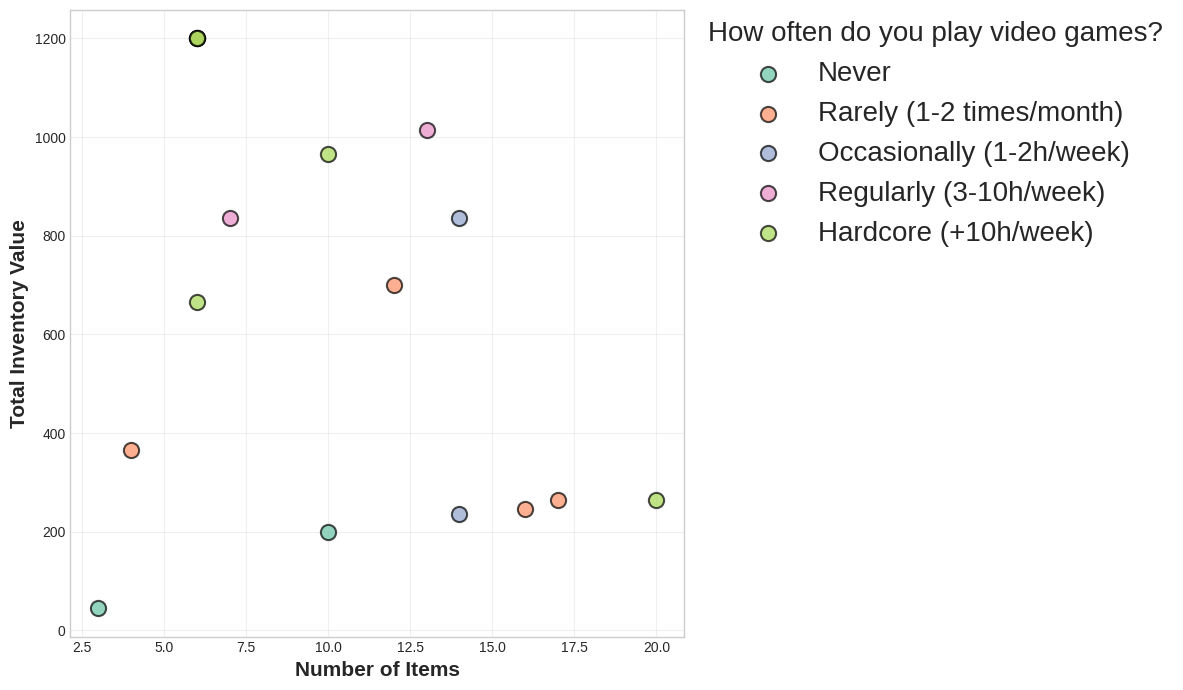

In [10]:
# Analyze inventory value strategies using bag_values dataset
# Check total inventory value at the end of each round
# Account for item sizes when counting inventory slots

# Item size mapping (width × height)
item_sizes = {
    'Coin': (1, 1),
    '2 Coins': (1, 2),
    '7 Coins': (3, 2),
    'Potion1': (1, 1),
    'Potion2': (2, 2),
    'Potion3': (3, 2),
    'Potion4': (4, 4),
    'WeaponBlue': (2, 2),
    'WeaponGreen': (2, 2),
    'WeaponRed': (2, 2),
}

# Item value mapping
item_values = {
    'Coin': 20,
    '2 Coins': 50,
    '7 Coins': 200,
    'Potion1': 5,
    'Potion2': 10,
    'Potion3': 30,
    'Potion4': 100,
    'WeaponRed': 15,
    'WeaponGreen': 15,
    'WeaponBlue': 15,
}

def find_rectangular_regions(positions: List[Tuple[int, int]], item_name: str) -> List[Tuple[int, int, int, int]]:
    """
    Group adjacent (x, y) positions with same item into rectangular regions.
    Returns list of (min_x, max_x, min_y, max_y) for each region.
    Uses a simple connected components approach for axis-aligned rectangles.
    """
    if not positions:
        return []
    
    visited = set()
    regions = []
    
    for start_pos in positions:
        if start_pos in visited:
            continue
        
        # BFS to find all connected cells
        queue = [start_pos]
        component = set()
        
        while queue:
            x, y = queue.pop(0)
            if (x, y) in visited or (x, y) not in positions:
                continue
            
            visited.add((x, y))
            component.add((x, y))
            
            # Check 4-adjacent neighbors
            for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                neighbor = (x + dx, y + dy)
                if neighbor in positions and neighbor not in visited:
                    queue.append(neighbor)
        
        # Get bounding box of component
        if component:
            xs = [pos[0] for pos in component]
            ys = [pos[1] for pos in component]
            min_x, max_x = min(xs), max(xs)
            min_y, max_y = min(ys), max(ys)
            regions.append((min_x, max_x, min_y, max_y))
    
    return regions

def count_items_in_region(region: Tuple[int, int, int, int], item_name: str, item_sizes: Dict) -> int:
    """
    Calculate how many items of a given type can fit in a rectangular region.
    Region is (min_x, max_x, min_y, max_y).
    """
    min_x, max_x, min_y, max_y = region
    region_width = max_x - min_x + 1
    region_height = max_y - min_y + 1
    region_area = region_width * region_height
    
    if item_name not in item_sizes:
        # If item not in mapping, assume 1x1
        return region_area
    
    item_width, item_height = item_sizes[item_name]
    item_area = item_width * item_height
    
    # Count how many items can fit (simple division)
    # Could be improved with more sophisticated packing algorithm
    if item_area == 0:
        return 0
    
    items_horizontally = region_width // item_width
    items_vertically = region_height // item_height
    
    return max(1, items_horizontally * items_vertically)  # At least 1 if region is non-empty

def count_items_at_timestamp(df_items: pd.DataFrame, timestamp: pd.Timestamp, item_sizes: Dict) -> int:
    """
    Count number of items in inventory at a specific timestamp using region grouping.
    """
    items_at_ts = df_items[df_items['timestamp'] == timestamp]
    
    if len(items_at_ts) == 0:
        return 0
    
    # Group by item name
    item_groups = {}
    for item_name in items_at_ts['item'].unique():
        positions = items_at_ts[items_at_ts['item'] == item_name][['x', 'y']].values
        positions = [(int(x), int(y)) for x, y in positions]
        item_groups[item_name] = positions
    
    total_items = 0
    
    # For each item type, find regions and count items
    for item_name, positions in item_groups.items():
        regions = find_rectangular_regions(positions, item_name)
        for region in regions:
            item_count = count_items_in_region(region, item_name, item_sizes)
            total_items += item_count
    
    return total_items

# For each participant and round, get final inventory state
final_inventory_metrics = []

for participant_dir in sorted(PARTICIPANT_DIRS):
    participant_name = participant_dir.name
    frequency = participant_frequency.get(participant_name, "Unknown")
    
    for round_name in ['round_1']:
        bag_items_file = participant_dir / round_name / 'bag_items.csv'
        bag_values_file = participant_dir / round_name / 'bag_values.csv'
        
        if bag_items_file.exists() and bag_values_file.exists():
            # Load bag_items to get items
            df_items = pd.read_csv(bag_items_file)
            df_items['timestamp'] = pd.to_datetime(df_items['timestamp'], format="%Y-%m-%dT%H:%M:%S")
            
            # Load bag_values to get total value
            df_values = pd.read_csv(bag_values_file)
            df_values['timestamp'] = pd.to_datetime(df_values['timestamp'], format="%Y-%m-%dT%H:%M:%S")
            
            if len(df_items) > 0 and len(df_values) > 0:
                # Get the final timestamp
                final_timestamp = df_items['timestamp'].max()
                
                # Count items at final timestamp using region grouping
                item_count = count_items_at_timestamp(df_items, final_timestamp, item_sizes)
                
                # Get total value at final timestamp (or closest timestamp)
                df_values['time_diff'] = abs((df_values['timestamp'] - final_timestamp).dt.total_seconds())
                closest_value_idx = df_values['time_diff'].idxmin()
                total_value = df_values.loc[closest_value_idx, 'value']
                
                # Calculate total slots occupied (for reference)
                final_items = df_items[df_items['timestamp'] == final_timestamp]
                unique_items = final_items[['x', 'y', 'item']].drop_duplicates()
                total_slots = 0
                for _, row in unique_items.iterrows():
                    item_name = row['item']
                    if item_name in item_sizes:
                        width, height = item_sizes[item_name]
                        total_slots += width * height
                    else:
                        total_slots += 1
                
                # Calculate metrics
                avg_value_per_item = total_value / item_count if item_count > 0 else 0
                avg_value_per_slot = total_value / total_slots if total_slots > 0 else 0
                
                final_inventory_metrics.append({
                    'participant': participant_name,
                    'round': round_name,
                    'frequency': frequency,
                    'num_items': item_count,
                    'total_slots': total_slots,
                    'total_value': total_value,
                    'avg_value_per_item': avg_value_per_item,
                    'avg_value_per_slot': avg_value_per_slot
                })

df_metrics = pd.DataFrame(final_inventory_metrics)

# Create scatter plot for round_1 only
fig, ax = plt.subplots(figsize=(12, 7))

df_round = df_metrics[df_metrics['round'] == 'round_1']

# Plot by frequency category
for category in gaming_categories:
    df_cat = df_round[df_round['frequency'] == category]
    if len(df_cat) > 0:
        ax.scatter(df_cat['num_items'], df_cat['total_value'], 
                   color=category_colors.get(category, 'gray'),
                   label=category, s=120, alpha=0.7, edgecolors='black', linewidths=1.5)

# # Add regression line
# if len(df_round) > 0 and df_round['num_items'].std() > 0:
#     z = np.polyfit(df_round['num_items'], df_round['total_value'], 1)
#     p = np.poly1d(z)
#     x_line = np.linspace(df_round['num_items'].min(), df_round['num_items'].max(), 100)
#     ax.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2, label='Fitted Logistic Regression')

ax.set_xlabel('Number of Items', fontsize=15, fontweight='bold')
ax.set_ylabel('Total Inventory Value', fontsize=15, fontweight='bold')
# ax.set_title('Number of Items vs Total Inventory Value', fontsize=24, fontweight='bold')

# bbox_to_anchor=(1.02, 1) places it just to the right of the axes
# loc='upper left' aligns the top-left corner of the legend box to that point
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=20, borderaxespad=0.,
          title="How often do you play video games?", title_fontsize=20)
# ax.legend(loc='best', fontsize=20)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Grid size: 6 x 6
Total coin entries: 314


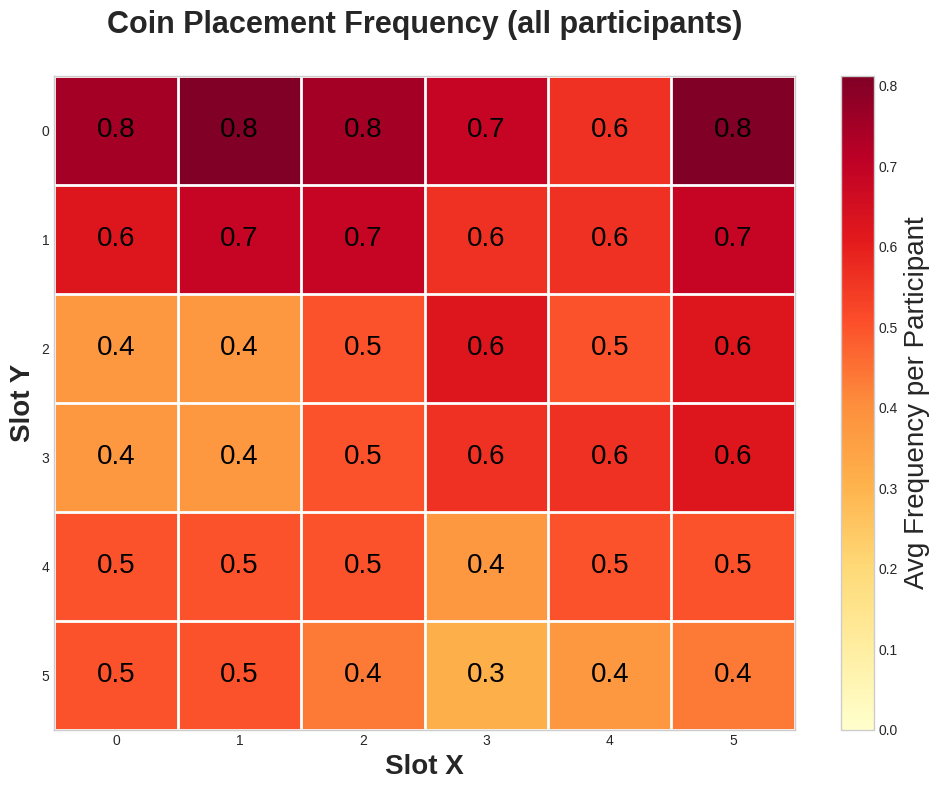

In [39]:
# Create heatmap showing coin placement frequency per inventory slot position

# Define item type categories for numeric encoding
item_type_mapping = {
    'Coin': 1,
    '2 Coins': 1,
    '7 Coins': 1,
    'Potion1': 2,
    'Potion2': 2,
    'Potion3': 2,
    'Potion4': 2,
    'WeaponRed': 3,
    'WeaponGreen': 3,
    'WeaponBlue': 3,
}

item_type_labels = {
    1: 'Coins',
    2: 'Potions',
    3: 'Weapons',
}

# Collect all bag_items for round_1
all_bag_items_r1 = []
for participant_dir in sorted(PARTICIPANT_DIRS):
    participant_name = participant_dir.name
    frequency = participant_frequency.get(participant_name, "Unknown")
    
    bag_items_file = participant_dir / 'round_1' / 'bag_items.csv'
    
    if bag_items_file.exists():
        df_items = pd.read_csv(bag_items_file)
        df_items['timestamp'] = pd.to_datetime(df_items['timestamp'], format="%Y-%m-%dT%H:%M:%S")
        df_items['participant'] = participant_name
        df_items['frequency'] = frequency
        
        # Get final timestamp and items
        final_timestamp = df_items['timestamp'].max()
        final_items = df_items[df_items['timestamp'] == final_timestamp].copy()
        
        all_bag_items_r1.append(final_items)

df_all_bag_items_r1 = pd.concat(all_bag_items_r1, ignore_index=True)

# Filter only coin items
coin_items = ['Coin', '2 Coins', '7 Coins']
df_coins = df_all_bag_items_r1[df_all_bag_items_r1['item'].isin(coin_items)]

# First, find grid dimensions
max_x = int(df_all_bag_items_r1['x'].max())
max_y = int(df_all_bag_items_r1['y'].max())

grid_height = max_y + 1
grid_width = max_x + 1

print(f"Grid size: {grid_width} x {grid_height}")
print(f"Total coin entries: {len(df_coins)}")

# Create single plot for all participants combined
fig, ax = plt.subplots(figsize=(10, 8))
ax.grid(False)

# Count all participants
total_participants = df_coins['participant'].nunique()

# Initialize heatmap data for coin frequency
coin_frequency = np.zeros((grid_height, grid_width))

# Count coin occurrences at each position across all participants
for _, row in df_coins.iterrows():
    x = int(row['x'])
    y = int(row['y'])
    coin_frequency[y, x] += 1

# Calculate average per participant
coin_frequency_avg = coin_frequency / total_participants if total_participants > 0 else coin_frequency
vmax = coin_frequency_avg.max() if coin_frequency_avg.max() > 0 else 1

# Use a colormap that goes from transparent/light to vibrant
cmap = plt.cm.YlOrRd  # Yellow-Orange-Red colormap

# Plot heatmap
im = ax.imshow(coin_frequency_avg, cmap=cmap, aspect='auto', vmin=0, vmax=vmax)

# Set ticks
ax.set_xticks(range(grid_width))
ax.set_yticks(range(grid_height))
ax.set_xticklabels(range(grid_width))
ax.set_yticklabels(range(grid_height))

# Add gridlines
ax.grid(which="major", visible=False)
ax.set_xticks(np.arange(-.5, grid_width, 1), minor=True)
ax.set_yticks(np.arange(-.5, grid_height, 1), minor=True)
ax.grid(which="minor", color="white", linestyle='-', linewidth=2)

# Labels and title
ax.set_xlabel('Slot X', fontsize=20, fontweight='bold')
ax.set_ylabel('Slot Y', fontsize=20, fontweight='bold')
ax.set_title('Coin Placement Frequency (all participants)\n', fontsize=22, fontweight='bold')

# Add text annotations
for y in range(grid_height):
    for x in range(grid_width):
        freq = coin_frequency_avg[y, x]
        if freq > 0:
            text = ax.text(x, y, f'{freq:.1f}',
                          ha="center", va="center", color="black", fontsize=20)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Avg Frequency per Participant', fontsize=20)

plt.tight_layout()
plt.show()

Grid size: 6 x 6
Total coin entries: 314


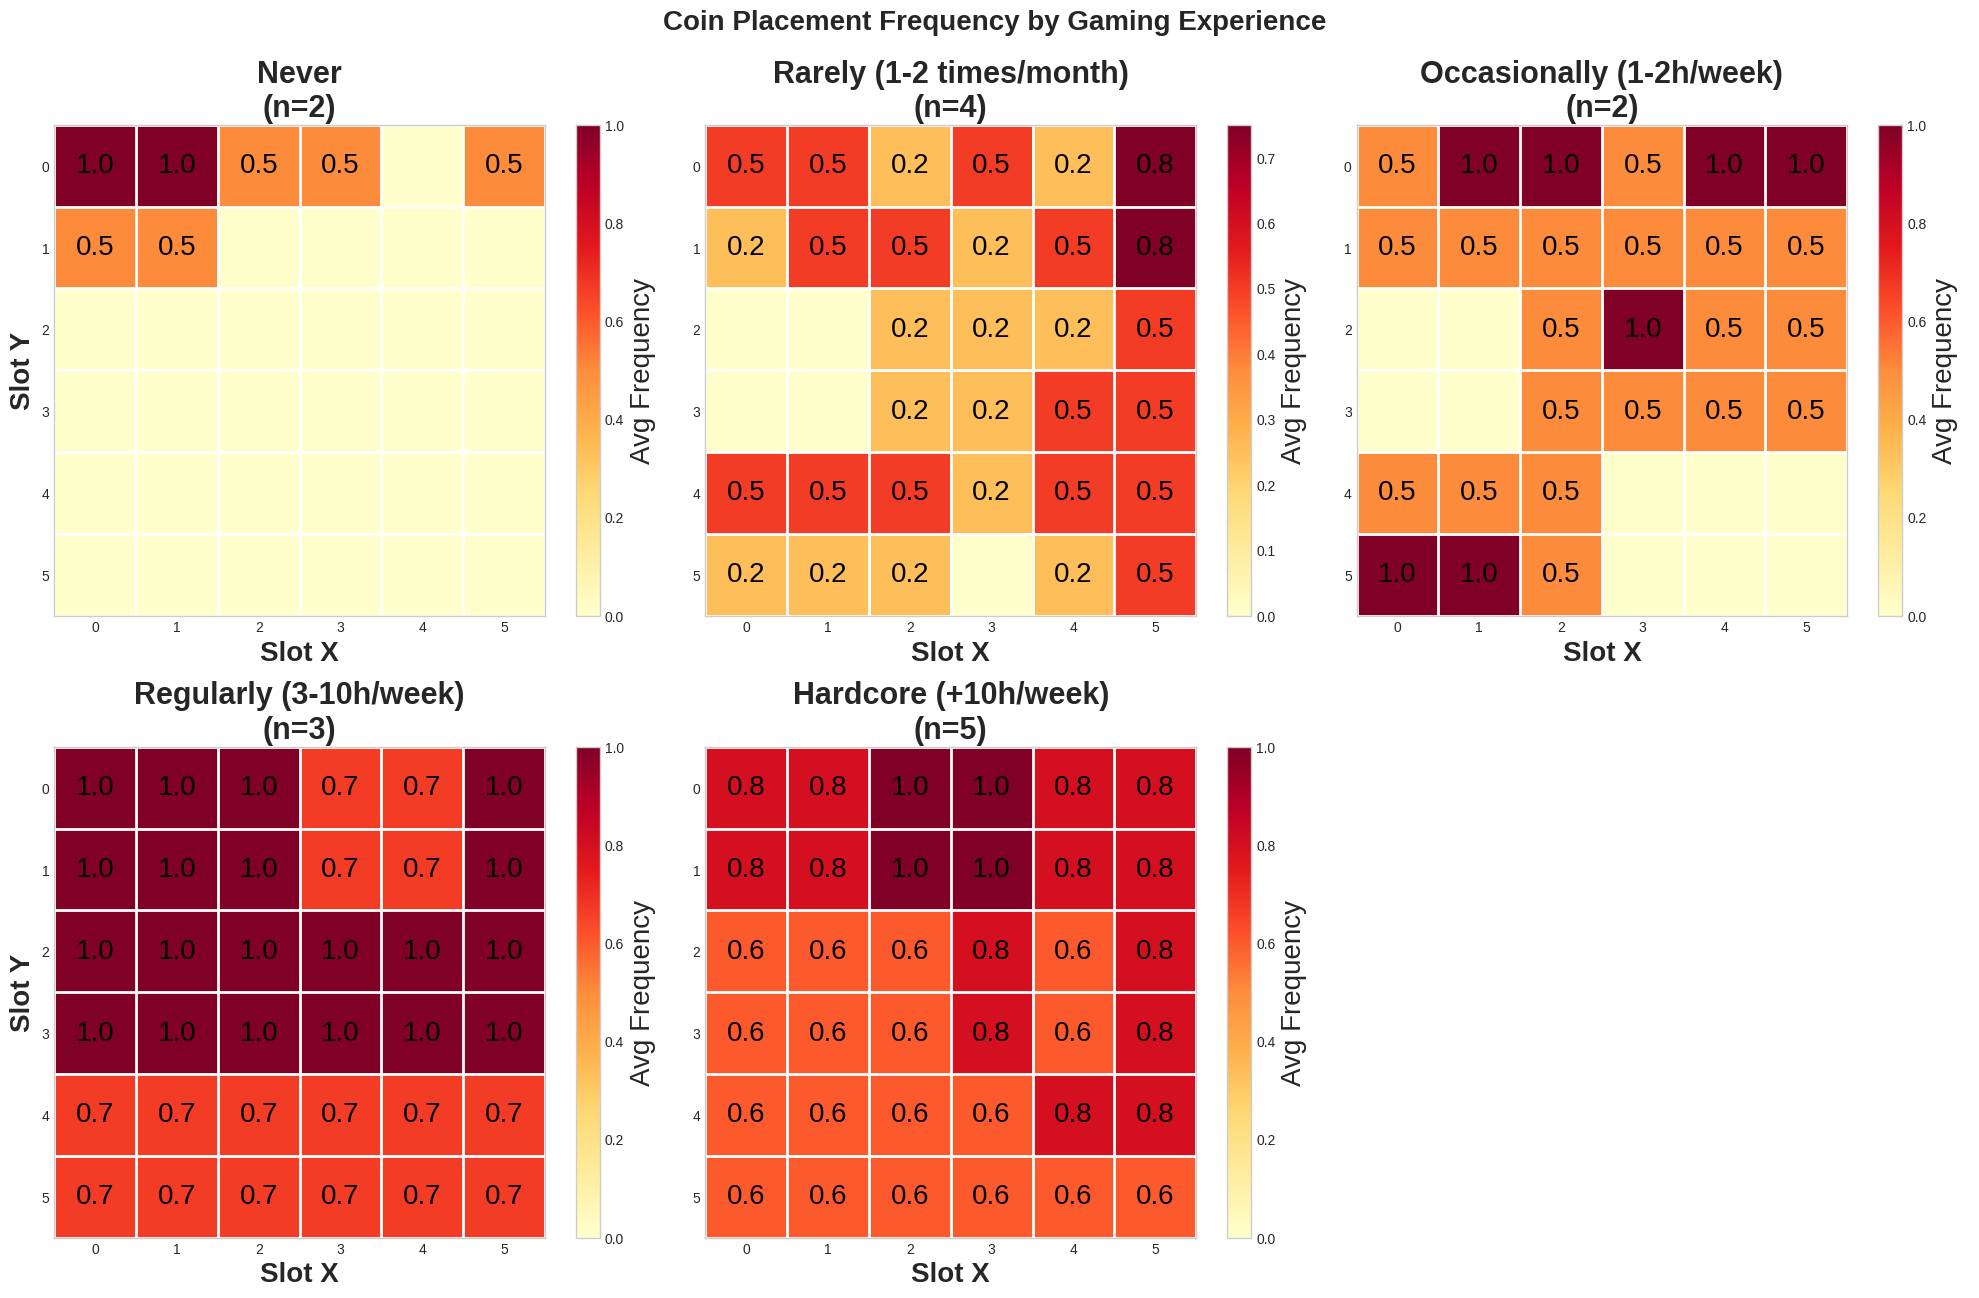

In [36]:
# (per category) Create heatmap showing coin placement frequency per inventory slot position

# Define item type categories for numeric encoding
item_type_mapping = {
    'Coin': 1,
    '2 Coins': 1,
    '7 Coins': 1,
    'Potion1': 2,
    'Potion2': 2,
    'Potion3': 2,
    'Potion4': 2,
    'WeaponRed': 3,
    'WeaponGreen': 3,
    'WeaponBlue': 3,
}

item_type_labels = {
    1: 'Coins',
    2: 'Potions',
    3: 'Weapons',
}

# Collect all bag_items for round_1
all_bag_items_r1 = []
for participant_dir in sorted(PARTICIPANT_DIRS):
    participant_name = participant_dir.name
    frequency = participant_frequency.get(participant_name, "Unknown")
    
    bag_items_file = participant_dir / 'round_1' / 'bag_items.csv'
    
    if bag_items_file.exists():
        df_items = pd.read_csv(bag_items_file)
        df_items['timestamp'] = pd.to_datetime(df_items['timestamp'], format="%Y-%m-%dT%H:%M:%S")
        df_items['participant'] = participant_name
        df_items['frequency'] = frequency
        
        # Get final timestamp and items
        final_timestamp = df_items['timestamp'].max()
        final_items = df_items[df_items['timestamp'] == final_timestamp].copy()
        
        all_bag_items_r1.append(final_items)

df_all_bag_items_r1 = pd.concat(all_bag_items_r1, ignore_index=True)

# Filter only coin items
coin_items = ['Coin', '2 Coins', '7 Coins']
df_coins = df_all_bag_items_r1[df_all_bag_items_r1['item'].isin(coin_items)]

# First, find grid dimensions
max_x = int(df_all_bag_items_r1['x'].max())
max_y = int(df_all_bag_items_r1['y'].max())

grid_height = max_y + 1
grid_width = max_x + 1

print(f"Grid size: {grid_width} x {grid_height}")
print(f"Total coin entries: {len(df_coins)}")

# Create 5 subplots in 2 rows (3 in first row, 2 in second row)
fig, axes = plt.subplots(2, 3, figsize=(20, 13))
fig.suptitle('Coin Placement Frequency by Gaming Experience', fontsize=20, fontweight='bold', y=0.995)

# Flatten axes for easier indexing
axes_flat = axes.flatten()

# Hide the 6th subplot (bottom right) since we only have 5 categories
axes_flat[5].axis('off')

# Use a colormap that goes from transparent/light to vibrant
cmap = plt.cm.YlOrRd  # Yellow-Orange-Red colormap

for idx, category in enumerate(gaming_categories):
    ax = axes_flat[idx]
    ax.grid(False)
    
    # Filter coins for this category
    df_coins_cat = df_coins[df_coins['frequency'] == category]
    
    # Count participants in this category
    participants_in_category = df_coins_cat['participant'].nunique()
    
    # Initialize heatmap data for coin frequency
    coin_frequency = np.zeros((grid_height, grid_width))
    
    # Count coin occurrences at each position
    for _, row in df_coins_cat.iterrows():
        x = int(row['x'])
        y = int(row['y'])
        coin_frequency[y, x] += 1
    
    # Calculate average per participant in this category
    if participants_in_category > 0:
        coin_frequency_avg = coin_frequency / participants_in_category
        vmax = coin_frequency_avg.max() if coin_frequency_avg.max() > 0 else 1
    else:
        coin_frequency_avg = coin_frequency
        vmax = 1
    
    # Plot heatmap
    im = ax.imshow(coin_frequency_avg, cmap=cmap, aspect='auto', vmin=0, vmax=vmax)
    
    # Set ticks
    ax.set_xticks(range(grid_width))
    ax.set_yticks(range(grid_height))
    ax.set_xticklabels(range(grid_width))
    ax.set_yticklabels(range(grid_height))
    
    # Add gridlines
    ax.grid(which="major", visible=False)
    ax.set_xticks(np.arange(-.5, grid_width, 1), minor=True)
    ax.set_yticks(np.arange(-.5, grid_height, 1), minor=True)
    ax.grid(which="minor", color="white", linestyle='-', linewidth=2)
    
    # Labels and title
    ax.set_xlabel('Slot X', fontsize=20, fontweight='bold')
    if idx % 3 == 0:
        ax.set_ylabel('Slot Y', fontsize=20, fontweight='bold')
    ax.set_title(f'{category}\n(n={participants_in_category})', fontsize=22, fontweight='bold')
    
    # Add text annotations
    for y in range(grid_height):
        for x in range(grid_width):
            freq = coin_frequency_avg[y, x]
            if freq > 0:
                text = ax.text(x, y, f'{freq:.1f}',
                              ha="center", va="center", color="black", fontsize=20)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Avg Frequency', fontsize=20)

plt.tight_layout()
plt.show()

Grid size: 6 x 6
Total potion entries: 108


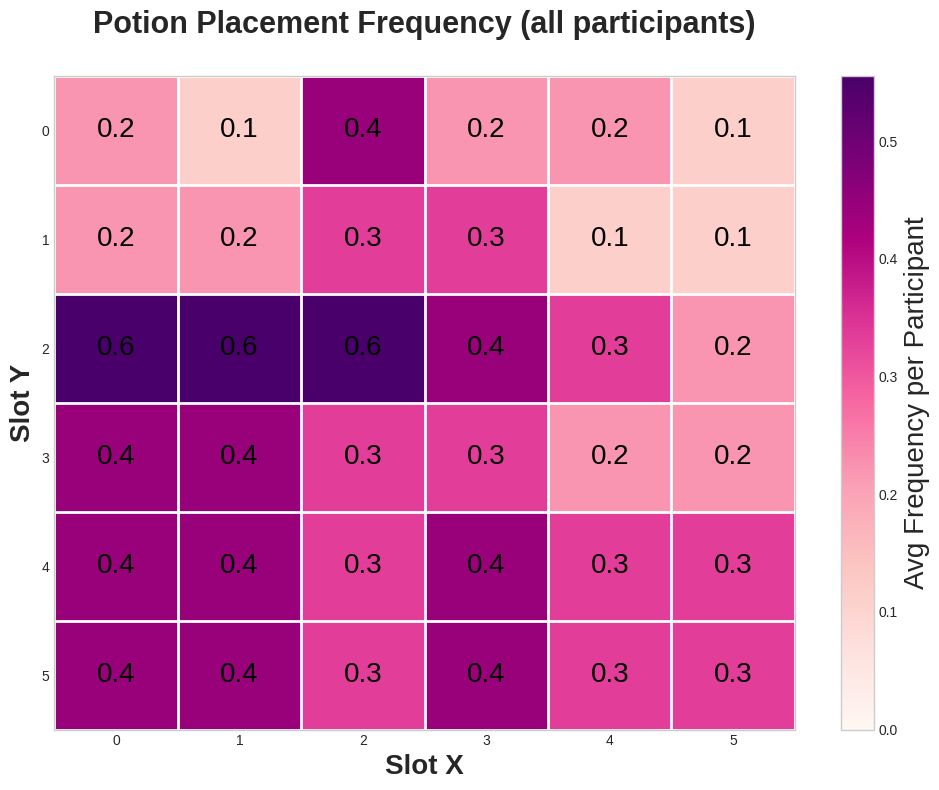

In [38]:
# Create heatmap showing coin placement frequency per inventory slot position

# Define item type categories for numeric encoding
item_type_mapping = {
    'Coin': 1,
    '2 Coins': 1,
    '7 Coins': 1,
    'Potion1': 2,
    'Potion2': 2,
    'Potion3': 2,
    'Potion4': 2,
    'WeaponRed': 3,
    'WeaponGreen': 3,
    'WeaponBlue': 3,
}

item_type_labels = {
    1: 'Coins',
    2: 'Potions',
    3: 'Weapons',
}

# Collect all bag_items for round_1
all_bag_items_r1 = []
for participant_dir in sorted(PARTICIPANT_DIRS):
    participant_name = participant_dir.name
    frequency = participant_frequency.get(participant_name, "Unknown")
    
    bag_items_file = participant_dir / 'round_1' / 'bag_items.csv'
    
    if bag_items_file.exists():
        df_items = pd.read_csv(bag_items_file)
        df_items['timestamp'] = pd.to_datetime(df_items['timestamp'], format="%Y-%m-%dT%H:%M:%S")
        df_items['participant'] = participant_name
        df_items['frequency'] = frequency
        
        # Get final timestamp and items
        final_timestamp = df_items['timestamp'].max()
        final_items = df_items[df_items['timestamp'] == final_timestamp].copy()
        
        all_bag_items_r1.append(final_items)

df_all_bag_items_r1 = pd.concat(all_bag_items_r1, ignore_index=True)

# Filter only coin items
potion_items = ['Potion1', 'Potion2', 'Potion3', 'Potion4']
df_potions = df_all_bag_items_r1[df_all_bag_items_r1['item'].isin(potion_items)]

# First, find grid dimensions
max_x = int(df_all_bag_items_r1['x'].max())
max_y = int(df_all_bag_items_r1['y'].max())

grid_height = max_y + 1
grid_width = max_x + 1

print(f"Grid size: {grid_width} x {grid_height}")
print(f"Total potion entries: {len(df_potions)}")

# Create single plot for all participants combined
fig, ax = plt.subplots(figsize=(10, 8))
ax.grid(False)

# Count all participants
total_participants = df_potions['participant'].nunique()

# Initialize heatmap data for potion frequency
potion_frequency = np.zeros((grid_height, grid_width))

# Count potion occurrences at each position across all participants
for _, row in df_potions.iterrows():
    x = int(row['x'])
    y = int(row['y'])
    potion_frequency[y, x] += 1

# Calculate average per participant
potion_frequency_avg = potion_frequency / total_participants if total_participants > 0 else potion_frequency
vmax = potion_frequency_avg.max() if potion_frequency_avg.max() > 0 else 1

# Use a colormap that goes from transparent/light to vibrant
cmap = plt.cm.RdPu

# Plot heatmap
im = ax.imshow(potion_frequency_avg, cmap=cmap, aspect='auto', vmin=0, vmax=vmax)

# Set ticks
ax.set_xticks(range(grid_width))
ax.set_yticks(range(grid_height))
ax.set_xticklabels(range(grid_width))
ax.set_yticklabels(range(grid_height))

# Add gridlines
ax.grid(which="major", visible=False)
ax.set_xticks(np.arange(-.5, grid_width, 1), minor=True)
ax.set_yticks(np.arange(-.5, grid_height, 1), minor=True)
ax.grid(which="minor", color="white", linestyle='-', linewidth=2)

# Labels and title
ax.set_xlabel('Slot X', fontsize=20, fontweight='bold')
ax.set_ylabel('Slot Y', fontsize=20, fontweight='bold')
ax.set_title('Potion Placement Frequency (all participants)\n', fontsize=22, fontweight='bold')

# Add text annotations
for y in range(grid_height):
    for x in range(grid_width):
        freq = potion_frequency_avg[y, x]
        if freq > 0:
            text = ax.text(x, y, f'{freq:.1f}',
                          ha="center", va="center", color="black", fontsize=20)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Avg Frequency per Participant', fontsize=20)

plt.tight_layout()
plt.show()

Grid size: 6 x 6
Total potion entries: 108


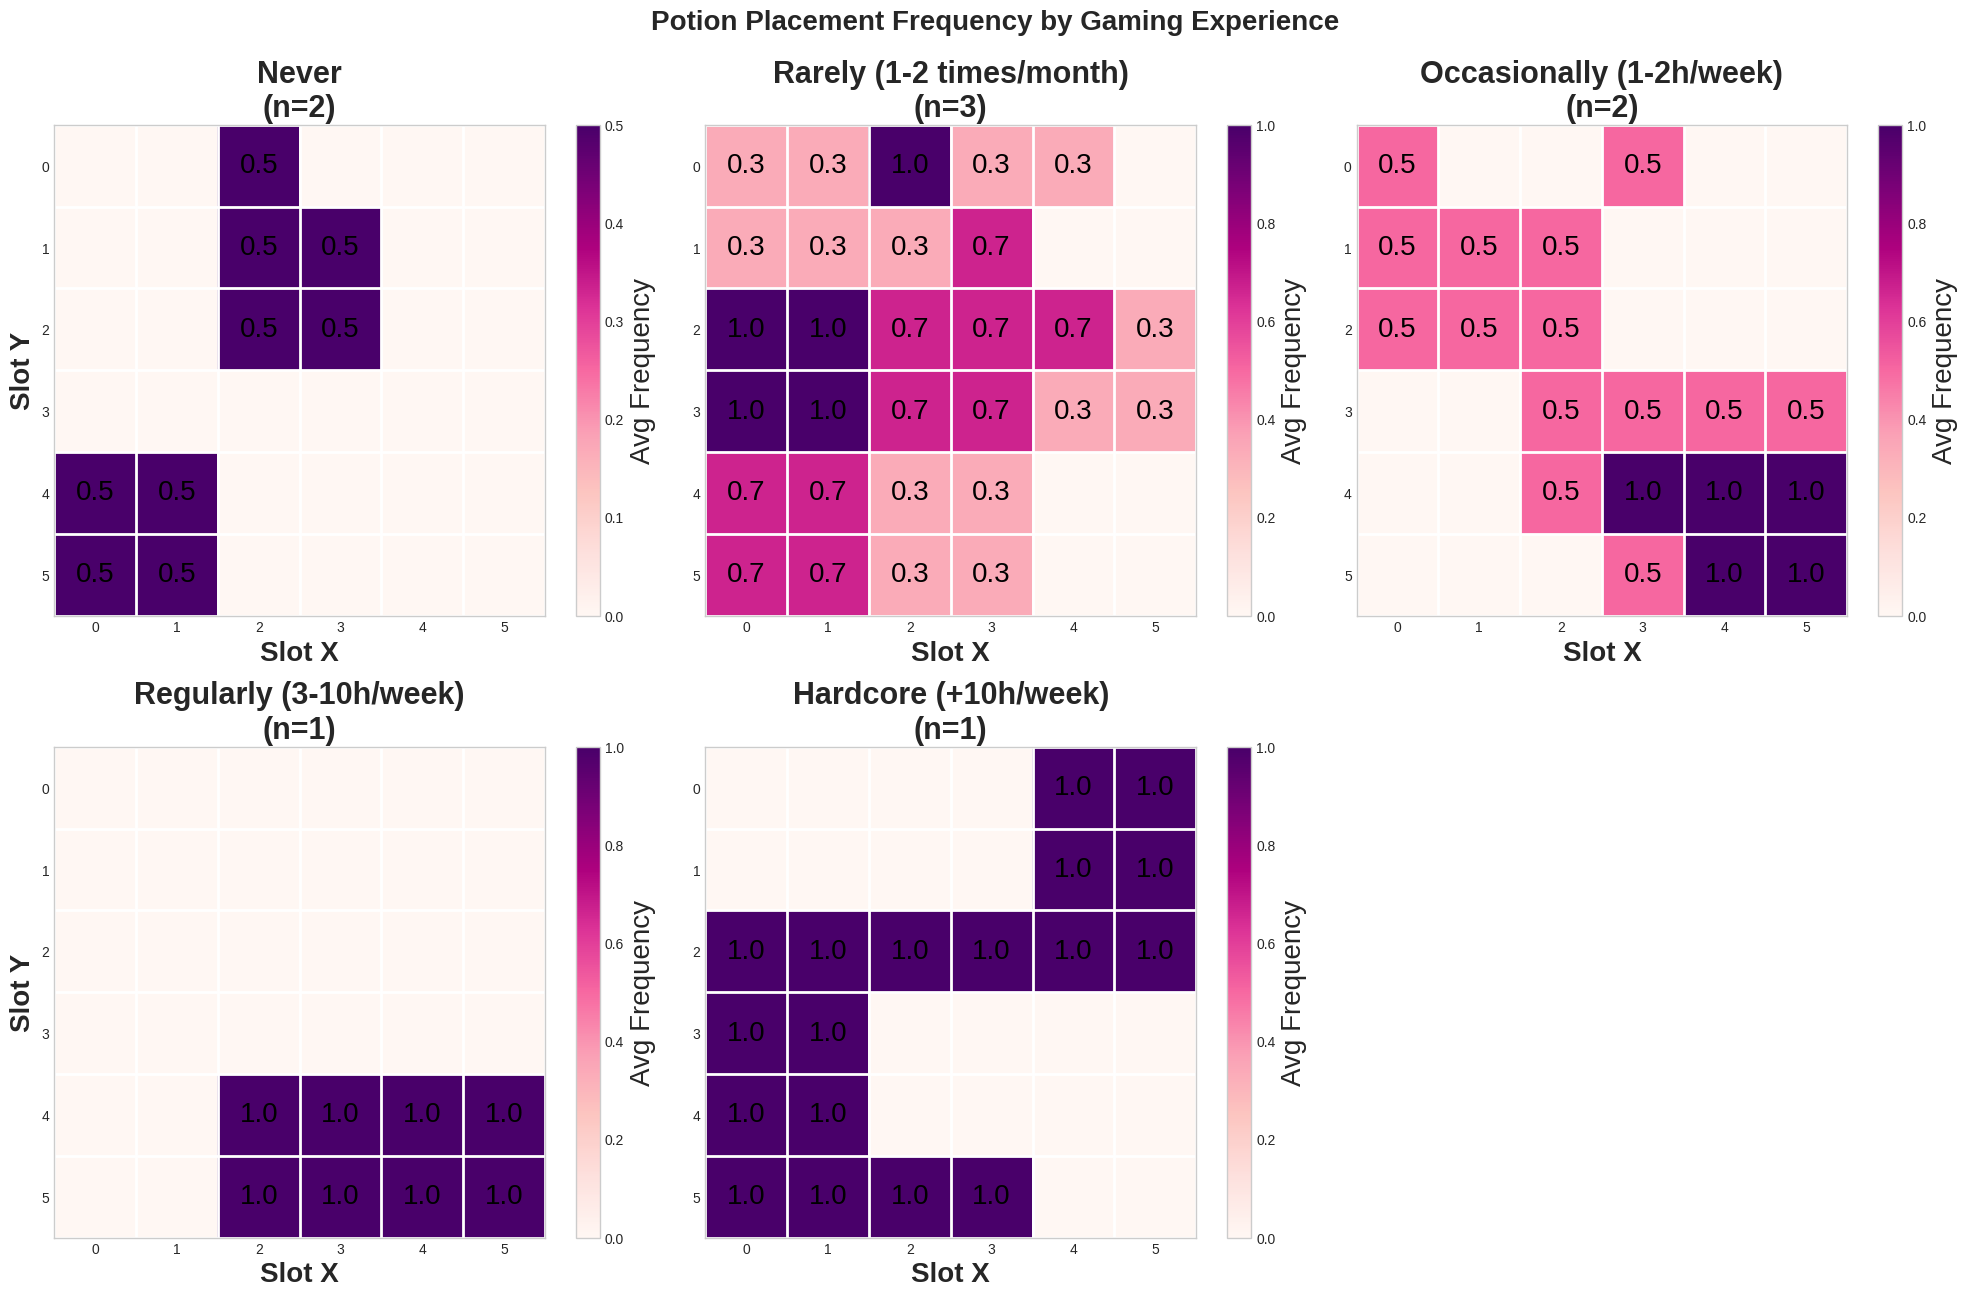

In [40]:
# (per category) Create heatmap showing potion placement frequency per inventory slot position

# Define item type categories for numeric encoding
item_type_mapping = {
    'Coin': 1,
    '2 Coins': 1,
    '7 Coins': 1,
    'Potion1': 2,
    'Potion2': 2,
    'Potion3': 2,
    'Potion4': 2,
    'WeaponRed': 3,
    'WeaponGreen': 3,
    'WeaponBlue': 3,
}

item_type_labels = {
    1: 'Coins',
    2: 'Potions',
    3: 'Weapons',
}

# Collect all bag_items for round_1
all_bag_items_r1 = []
for participant_dir in sorted(PARTICIPANT_DIRS):
    participant_name = participant_dir.name
    frequency = participant_frequency.get(participant_name, "Unknown")
    
    bag_items_file = participant_dir / 'round_1' / 'bag_items.csv'
    
    if bag_items_file.exists():
        df_items = pd.read_csv(bag_items_file)
        df_items['timestamp'] = pd.to_datetime(df_items['timestamp'], format="%Y-%m-%dT%H:%M:%S")
        df_items['participant'] = participant_name
        df_items['frequency'] = frequency
        
        # Get final timestamp and items
        final_timestamp = df_items['timestamp'].max()
        final_items = df_items[df_items['timestamp'] == final_timestamp].copy()
        
        all_bag_items_r1.append(final_items)

df_all_bag_items_r1 = pd.concat(all_bag_items_r1, ignore_index=True)

# Filter only potion items
potion_items = ['Potion1', 'Potion2', 'Potion3', 'Potion4']
df_potions = df_all_bag_items_r1[df_all_bag_items_r1['item'].isin(potion_items)]

# First, find grid dimensions
max_x = int(df_all_bag_items_r1['x'].max())
max_y = int(df_all_bag_items_r1['y'].max())

grid_height = max_y + 1
grid_width = max_x + 1

print(f"Grid size: {grid_width} x {grid_height}")
print(f"Total potion entries: {len(df_potions)}")

# Create 5 subplots in 2 rows (3 in first row, 2 in second row)
fig, axes = plt.subplots(2, 3, figsize=(20, 13))
fig.suptitle('Potion Placement Frequency by Gaming Experience', fontsize=20, fontweight='bold', y=0.995)

# Flatten axes for easier indexing
axes_flat = axes.flatten()

# Hide the 6th subplot (bottom right) since we only have 5 categories
axes_flat[5].axis('off')

# Use the same purple colormap as the other potion plot
cmap = plt.cm.RdPu

for idx, category in enumerate(gaming_categories):
    ax = axes_flat[idx]
    ax.grid(False)
    
    # Filter potions for this category
    df_potions_cat = df_potions[df_potions['frequency'] == category]
    
    # Count participants in this category
    participants_in_category = df_potions_cat['participant'].nunique()
    
    # Initialize heatmap data for potion frequency
    potion_frequency = np.zeros((grid_height, grid_width))
    
    # Count potion occurrences at each position
    for _, row in df_potions_cat.iterrows():
        x = int(row['x'])
        y = int(row['y'])
        potion_frequency[y, x] += 1
    
    # Calculate average per participant in this category
    if participants_in_category > 0:
        potion_frequency_avg = potion_frequency / participants_in_category
        vmax = potion_frequency_avg.max() if potion_frequency_avg.max() > 0 else 1
    else:
        potion_frequency_avg = potion_frequency
        vmax = 1
    
    # Plot heatmap
    im = ax.imshow(potion_frequency_avg, cmap=cmap, aspect='auto', vmin=0, vmax=vmax)
    
    # Set ticks
    ax.set_xticks(range(grid_width))
    ax.set_yticks(range(grid_height))
    ax.set_xticklabels(range(grid_width))
    ax.set_yticklabels(range(grid_height))
    
    # Add gridlines
    ax.grid(which="major", visible=False)
    ax.set_xticks(np.arange(-.5, grid_width, 1), minor=True)
    ax.set_yticks(np.arange(-.5, grid_height, 1), minor=True)
    ax.grid(which="minor", color="white", linestyle='-', linewidth=2)
    
    # Labels and title
    ax.set_xlabel('Slot X', fontsize=20, fontweight='bold')
    if idx % 3 == 0:
        ax.set_ylabel('Slot Y', fontsize=20, fontweight='bold')
    ax.set_title(f'{category}\n(n={participants_in_category})', fontsize=22, fontweight='bold')
    
    # Add text annotations
    for y in range(grid_height):
        for x in range(grid_width):
            freq = potion_frequency_avg[y, x]
            if freq > 0:
                text = ax.text(x, y, f'{freq:.1f}',
                              ha="center", va="center", color="black", fontsize=20)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Avg Frequency', fontsize=20)

plt.tight_layout()
plt.show()